Starting Simple: Mean Models & Linear Regression

## I. Bare Bones Simplicity

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('simulated_data.csv')

df.head()

,x,y
0,0.000000,0.086260
1,0.063467,0.881165
2,0.126933,0.145261
3,0.190400,-0.252824
4,0.253866,-0.320448


In [14]:
# Build model
pred = np.mean(df.y)

In [15]:
# Display predictions for any value of x
print(pred)

-0.017254917297324993


In [128]:
# The average value of y's in our simulated dataset is -0.01725, so that will always be our prediction.

## II. Mean Model Performance

In [16]:
df.x.tail()

95    6.029319
96    6.092786
97    6.156252
98    6.219719
99    6.283185
Name: x, dtype: float64

In [17]:
len(df.x)

100

In [18]:
pred

-0.017254917297324993

In [19]:
# Duplicate predicted value 5 times
[pred]*5

[-0.017254917297324993,
 -0.017254917297324993,
 -0.017254917297324993,
 -0.017254917297324993,
 -0.017254917297324993]

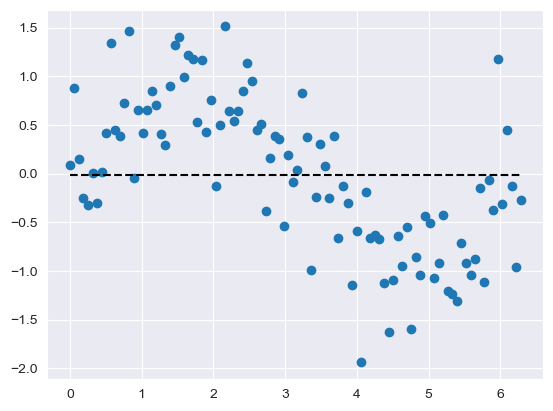

In [20]:
# Scatterplot of x and y
plt.scatter(df.x, df.y)

# Overlay horizontal line for the prediction
plt.plot(df.x, [pred]*len(df.x), 'k--' )
plt.show()

In [134]:
#In summary, our mean model is underfit to the data. It's not complex enough.

## III. Sloping Complexity

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
# Initialize instance of linear regression
lm = LinearRegression()

# Separate our input features and target variable
features = df.drop('y', axis=1)
target = df.y

# Fit model to the data
lm.fit(features, target)


LinearRegression()

In [60]:
print( lm.intercept_ )
print( lm.coef_ )

0.8238675120273317
[-0.26773758]


## IV. Linear Regression Performance

In [45]:
# Predict y for x=0
print( lm.predict([[0]]) )

[0.82386751]


C:\Users\jensh\anaconda4\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [46]:
print( lm.intercept_ )

0.8238675120273317


In [47]:
print( lm.predict([[0]]) == lm.intercept_ )

[ True]


C:\Users\jensh\anaconda4\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [48]:
print( lm.predict([[2]]) )

[0.28839234]


C:\Users\jensh\anaconda4\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [49]:
print( lm.intercept_ + 2*lm.coef_ )

[0.28839234]


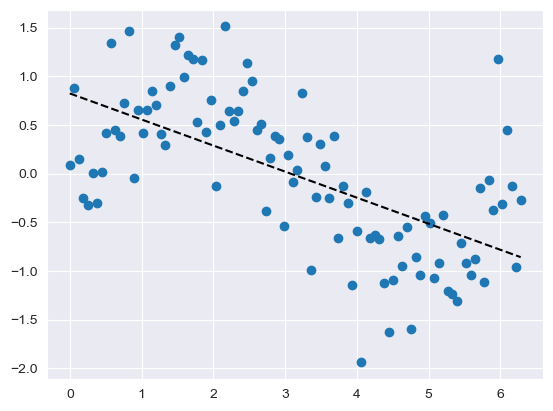

In [50]:
# Plot original points
plt.scatter(df.x, df.y)

# Plot predicted values of y
plt.plot(df.x, lm.predict(features), 'k--')

plt.show()

Well it's pretty obvious that this linear model fits the pattern of the data better than the mean model, even just by eyeballing it.
By allowing the line to have a slope, you've permitted more flexibility than the horizontal line of the mean model.
However, we're also seeing a limitation of the linear model: the assumption of linearity.

Linear regression assumes that the target variable has linear relationships with the input features.
Therefore, "curvy" relationships like our sine wave cannot be represented using a simple linear regression.
In summary... our linear regression model is STILL not complex/flexible enough!

In [34]:
print( lm.predict( 3.75 ) )
print( lm.predict( -43 ) )
print( lm.predict( 2*np.pi ) )

C:\Users\jensh\anaconda4\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=3.75.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.